In [51]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
from pathlib import Path

In [52]:
model_lookup_name = "llama-3-70b-chat"

topicgpt_path = Path("../../topicGPT")

In [53]:
folder_path = f'{topicgpt_path}/data/output/{model_lookup_name}'
if not os.path.exists(folder_path):
    print('Files not found')

In [54]:
# Fetch all data from the directory
refinement_data = []
refinement_file= "refinement_updated.jsonl"
refinement_data = pd.read_json(os.path.join(folder_path, refinement_file), lines=True)


In [55]:
# Plot Number of Topics Over Documents
count_new=[]
count=0
topics_found=set()
for index, row in refinement_data.iterrows():
    # v_arr=v.split()
    i=row['refined_responses'].split('\n')
    dict_responses={}

    for ind,xml_string in enumerate(i):
        if re.match("Note:", xml_string):
            continue
        if re.match('\[[0-9]*\]',xml_string):
            xml_string=re.sub('\[[0-9]*\] ','',xml_string)
            try:
                # print(xml_string.split(':')[1])
                dict_responses[xml_string.split(':')[0]]=xml_string.split(':')[1].lstrip()

            except:
                # print('no desc found')
                dict_responses[xml_string.split(':')[0]]='NA'
    row['refined_responses']=dict_responses
    # count_new.append(count)


Text(0.5, 1.0, 'Number of Topics Over Documents')

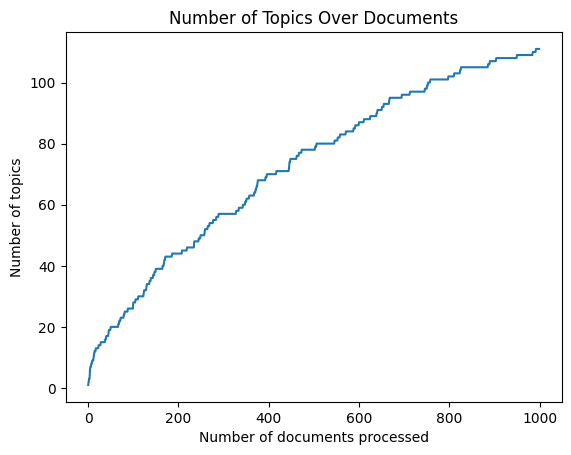

In [58]:
count_arr=[]
topics_found={}
count=0

for index,row in refinement_data.iterrows():
    for i in row['refined_responses'].keys():
        if i in topics_found:
            continue
        else: 
            count=count+1
            topics_found[i]=1
    count_arr.append(count)
    
plt.plot(range(len(refinement_data)), count_arr)
plt.xlabel("Number of documents processed")
plt.ylabel("Number of topics")
plt.title("Number of Topics Over Documents")